In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

In [17]:
df = pd.read_csv('SpotifyFeatures.csv')
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


# Data Content

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [4]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


**The dataset we used shows the mean popularity value of 41.12 .**

In [5]:
df.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

**From the above data we get to know that there are no null values in the Dataset**

In [6]:
print(df.keys())

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


**These are the names of the keys present in the dataset**

In [7]:
 for i in list(df.columns):
        print("{}--{}".format(i,df[i].value_counts().shape[0]))

genre--27
artist_name--14564
track_name--148615
track_id--176774
popularity--101
acousticness--4734
danceability--1295
duration_ms--70749
energy--2517
instrumentalness--5400
key--12
liveness--1732
loudness--27923
mode--2
speechiness--1641
tempo--78512
time_signature--5
valence--1692


In [19]:
sns.set(rc={'axes.facecolor':'black',
    'figure.facecolor':'black',
    'text.color':'white',
    'xtick.color':'white',
    'ytick.color':'white',
    'axes.labelcolor':'white'})

In [9]:
colors = ['#A435F0','#4435BB']

Text(0.5, 1.0, 'Distribution of Popularity Scores -Entire Data Set')

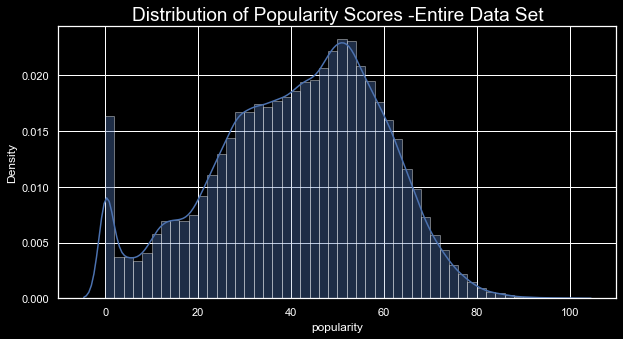

In [20]:
fig = plt.figure(figsize = (10,5))
sns.distplot(df['popularity'])
plt.title('Distribution of Popularity Scores -Entire Data Set',fontsize = 19)

**This graph shows the Propularity Distribution throughtout the Dataset**

<AxesSubplot:xlabel='acousticness', ylabel='Density'>

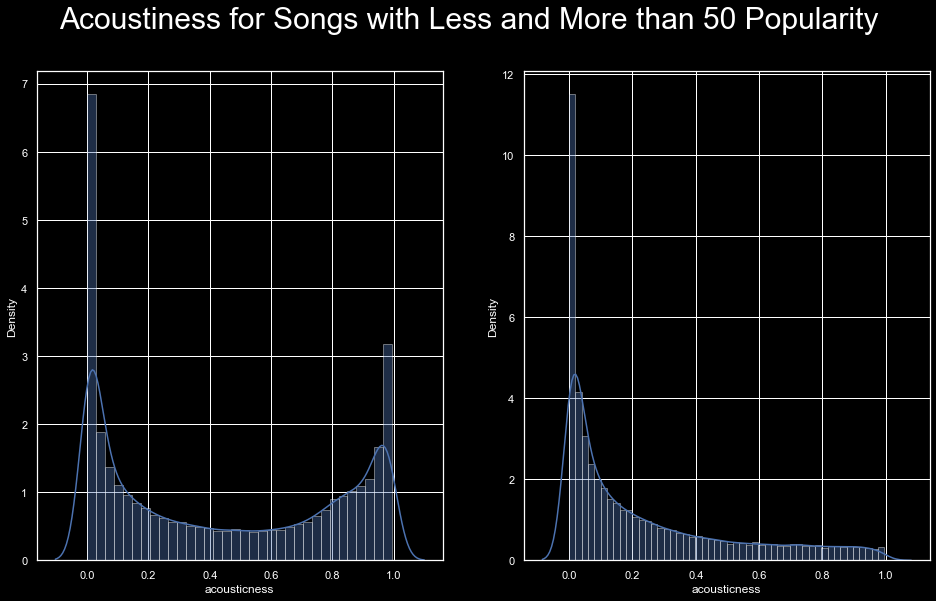

In [21]:
fig = plt.figure(figsize = (16,9))

plt.subplot(1,2,1)
popular_below_50 = df[df.popularity < 50]
sns.distplot(popular_below_50['acousticness'])
fig.suptitle('Acoustiness for Songs with Less and More than 50 Popularity',fontsize = 30)


plt.subplot(1,2,2)
popular_above_50 = df[df.popularity > 50]
sns.distplot(popular_above_50['acousticness'])


**The first graph depicts the Acoustiness of the songs with popularity less than 50**

**The second graph depicts the Acoustiness of the songs with popularity more than 50**

Text(0.5, 1.0, 'Popularity Based on Mode and Key')

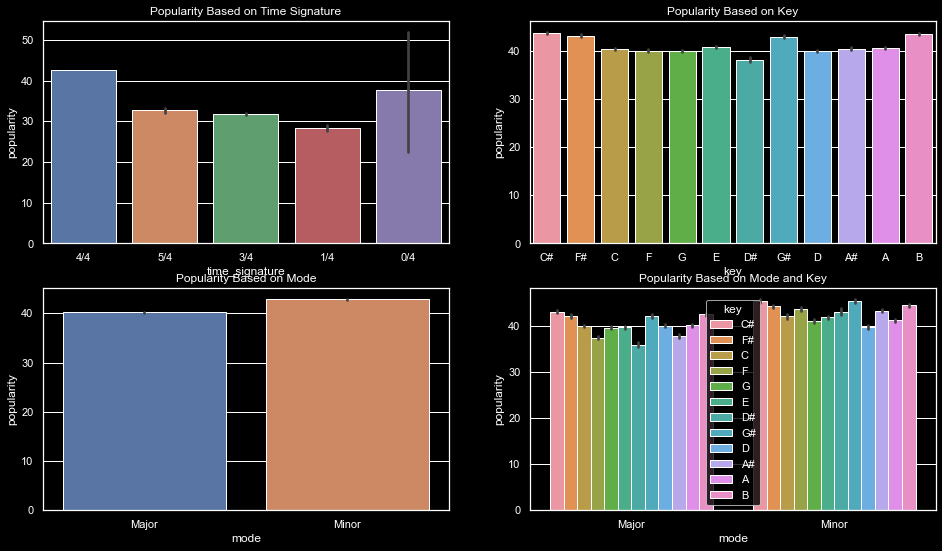

In [12]:
plt.figure(figsize = (16,9))
plt.subplot(2,2,1)
sns.barplot(x = 'time_signature', y = 'popularity', data = df)
plt.title('Popularity Based on Time Signature')
plt.subplot(2,2,2)
sns.barplot(x = 'key', y = 'popularity', data = df)
plt.title('Popularity Based on Key')
plt.subplot(2,2,3)
sns.barplot(x = 'mode', y = 'popularity', data = df)
plt.title('Popularity Based on Mode')
plt.subplot(2,2,4)
sns.barplot(x = 'mode', y = 'popularity', hue = 'key', data = df)
plt.title('Popularity Based on Mode and Key')

**The above four graphs depict the popularity with respect to "Time-signature", "Key", "Mode", "Mode and Key" respectively**

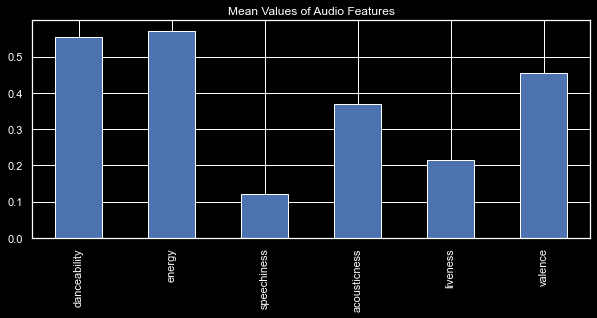

In [13]:
small = df[['danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence']]
plt.figure(figsize=(10,4))
small.mean().plot.bar()
plt.title('Mean Values of Audio Features')
plt.show()

**The above graphs exhibit bars depicting the average values of 'danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence'**

<Figure size 1728x720 with 0 Axes>

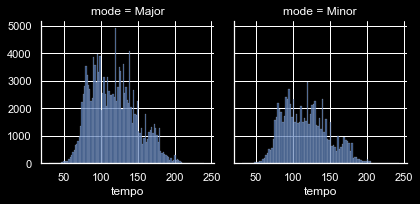

In [14]:

plt.figure(figsize = (24,10))
g = sns.FacetGrid(df, col='mode')
g.map(sns.histplot, "tempo")
plt.show()

**tempo is how fast or slow a piece of music is performed . Based on this we have plotted two variety of modes in the form of histogram plots.**

<AxesSubplot:xlabel='key', ylabel='count'>

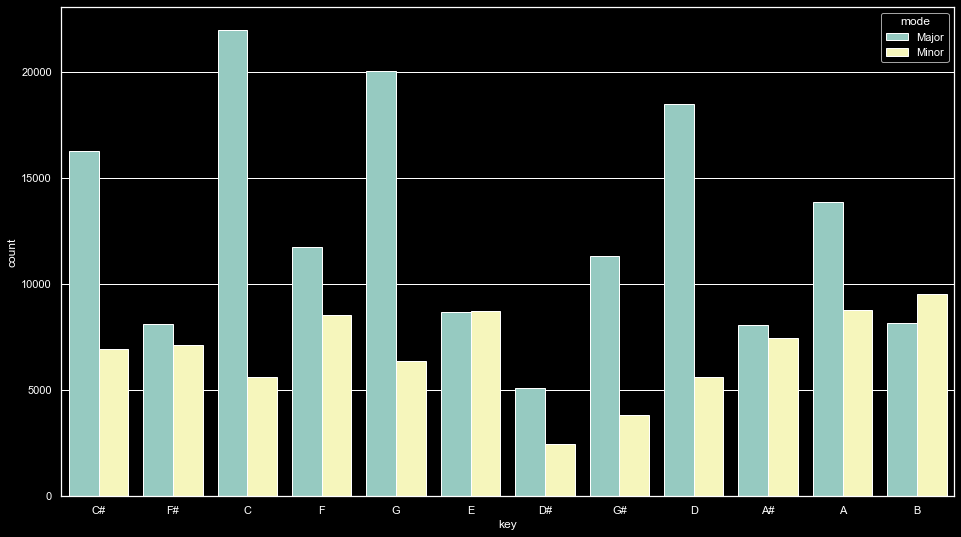

In [15]:
plt.figure(figsize=(16,9))
sns.countplot(data=df, x='key',hue='mode', palette = 'Set3')

**We have plotted the key and divided it using hue.**

<AxesSubplot:>

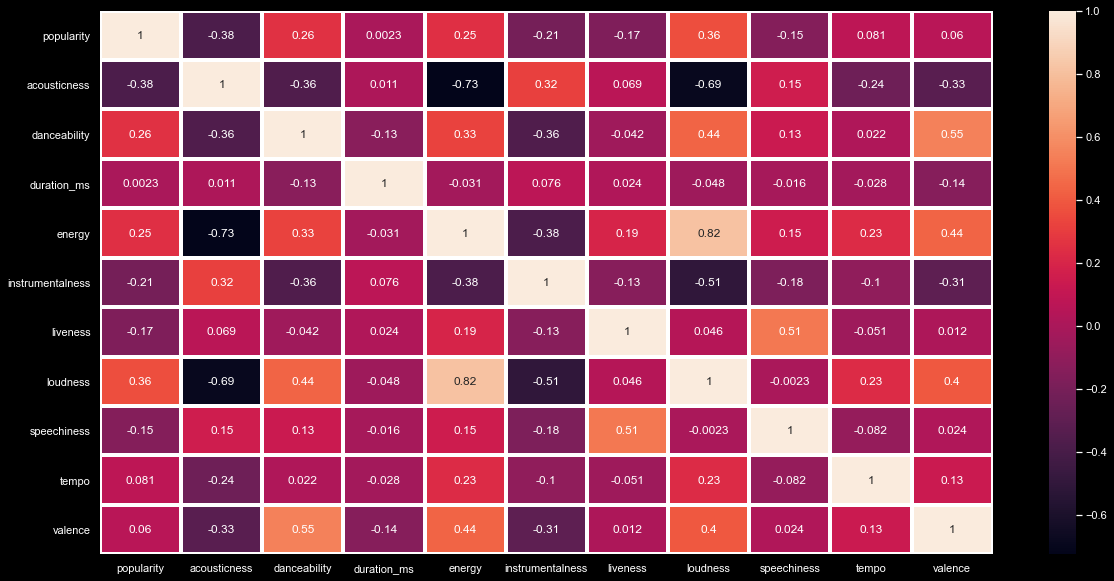

In [17]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),annot = True,linewidth=3)

**We have plotted the heat map of correlation of the Dataset**